In [1]:
import numpy as np
import gc
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../")
sys.path.append("../03_experimental_data_chemical_shifts/")


import SRT_optimization as srt
import handle_BMBR as BMBR

import matplotlib.gridspec as gridspec

In [2]:
BMBR_path="../../../OLD_CORY/sds_vs_peptide/BMRB_experimental_data/"

In [3]:
experiments=BMBR.load_BMBR(BMBR_path)

4697 .


In [1]:
plt.rcParams["figure.autolayout"] = True
smallers={300:0, 400:1, 500:2, 600:3, 800:4}
biggers={400:5, 500:4, 600:3, 700:2, 800:1, 900:0}

plt.rcParams.update({'font.size': 8})

gammaH=267.513*10**6;
gammaN=-27.166*10**6;


mu = 4 * np.pi * 10**(-7) #magnetic constant of vacuum permeability
h_planck = 1.055 * 10**(-34); #reduced Planck constant
rN = 0.101 * 10**(-9); # average cubic length of N-H bond
d = 1 * (mu * gammaN * gammaH * h_planck) / (4 * np.pi * rN**3); # dipolar coupling constant

fig, axs = plt.subplots(3,2,figsize=(8,8),sharex=False, sharey=False)

color=0
for i,entry in enumerate(experiments):
    #if entry!='4697':
    #if entry in ['18864','16360','26845','6243']:
    if entry in ['5569']:
        cond=-1
        for condition in experiments[entry]['T2measur']:
            if len(experiments[entry]['T2measur'][condition])>1:
                #print(entry)
                fields={}
                for meas in experiments[entry]['T2measur'][condition]:
                    if experiments[entry]['T2measur'][condition][meas]['expType'] == 'N':
                        fields[experiments[entry]['T2measur'][condition][meas]['field']]=meas
                fields=dict(sorted(fields.items()))
                cond+=1
                for smaller_c in fields:
                    for bigger_c in fields:
                        if bigger_c>smaller_c:
                        
                            if int(float(smaller_c))%10==0:
                                smaller=(int(float(smaller_c)))
                                smaller_s=smaller_c
                            else:
                                smaller=(int(float(smaller_c)))+1
                                smaller_s=smaller_c
                            if int(float(bigger_c))%10==0:
                                bigger=(int(float(bigger_c)))
                                bigger_s=bigger_c
                            else:
                                bigger=(int(float(bigger_c)))+1
                                bigger_s=bigger_c

                                
                            #define the fields and constants for the evaluation of the Rex
                            # Rex = (A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)^2)
                            B1=float(smaller_s)*2*np.pi/gammaH*10**6
                            B2=float(bigger_s)*2*np.pi/gammaH*10**6

                            wn1 = gammaN * B1 
                            wn2 = gammaN * B2 

    
                            K1=(d**2 / 20)
                            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
                            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

                            A1=1/(4*K1+4*K2_1)
                            A2=1/(4*K1+4*K2_2)
                            
                            Rex=[]
                            Rex2=[]
                            residues=[]
                            eff=[]
                            for pos,res in enumerate(experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["atomID"]):
                                if res in experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]["atomID"]:
                                    pos_big=experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]["atomID"].index(res)
                                    if experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["AA"][pos]==experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]['AA'][pos_big]:
                                        R2_1=experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["R2"][pos]
                                        R2_2=experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]["R2"][pos_big]
                                        Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(smaller_s)/500)**2))
                                        Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                                        residues.append(int(res))
                                        eff.append((R2_1-Rex2[-1])*A1*10**9)
                            axs[1,cond].plot(residues,eff,"-",label=f'Fields: {smaller_s} - {bigger_s}')
                            axs[0,cond].plot(residues,Rex,"-",label=f'Fields: {smaller_s} - {bigger_s}')
                    
                    residues=[]
                    eff=[]
                    for pos,res in enumerate(experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["atomID"]):
                        R2_1=experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["R2"][pos]
                        residues.append(int(res))
                        eff.append((R2_1)*A1*10**9)
                    axs[2,cond].plot(residues,eff,"-",label=f'Field: {smaller_c}')
                            
axs[0,0].legend(prop={'size':8})
axs[1,0].legend(prop={'size':8})
axs[2,0].legend(prop={'size':8})

axs[0,1].legend(prop={'size':8})
axs[1,1].legend(prop={'size':8})
axs[2,1].legend(prop={'size':8})
axs[0,0].set_ylabel('Rex corrected for 500 MHz [s^-1]')
axs[1,0].set_ylabel('Corrected Effective Time [ns]')
axs[2,0].set_ylabel('Effective Times from the measured R2 data [ns]')
axs[2,0].set_xlabel("Residue")
axs[2,1].set_xlabel("Residue")


axs[0,0].set_title("Condition 1")
axs[0,1].set_title("Condition 2")
plt.savefig('Rex_term4.png')

NameError: name 'plt' is not defined

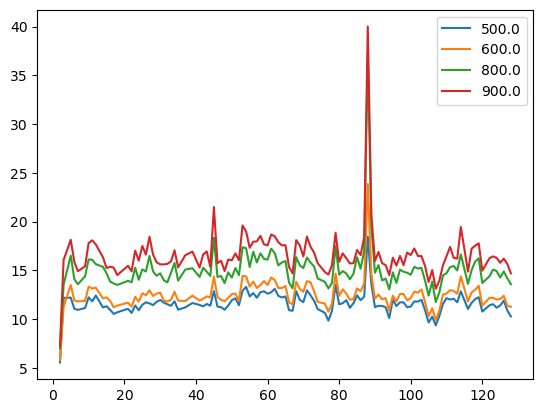

In [17]:
for exp,data in experiments['6243']['T2measur']['$condition_one'].items():
    plt.plot((data['results']['atomID']),(data['results']['R2']),label=data['field'])
plt.legend()

In [5]:
experiment=np.loadtxt('experimental_Rex_CsPinA.dat')

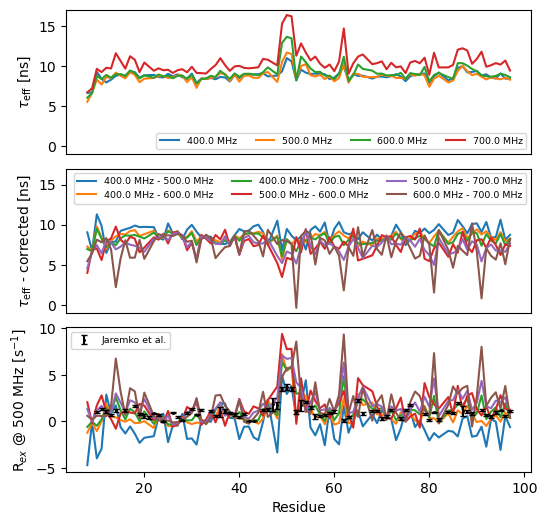

In [9]:

smallers={300:0, 400:1, 500:2, 600:3, 800:4}
biggers={400:5, 500:4, 600:3, 700:2, 800:1, 900:0}

gammaH=267.513*10**6;
gammaN=-27.166*10**6;


mu = 4 * np.pi * 10**(-7) #magnetic constant of vacuum permeability
h_planck = 1.055 * 10**(-34); #reduced Planck constant
rN = 0.101 * 10**(-9); # average cubic length of N-H bond
d = 1 * (mu * gammaN * gammaH * h_planck) / (4 * np.pi * rN**3); # dipolar coupling constant

#fig, axs = plt.subplots(3,2,figsize=(8,8),sharex=False, sharey=False)

fig = plt.figure(figsize=(6,6))
outer = gridspec.GridSpec(3,1, hspace=0.1)
axs={}
for i in range(3):
    axs[i] = plt.Subplot(fig,outer[i])
    fig.add_subplot(axs[i])
    if i<2:
        axs[i].set_xticklabels([])
        axs[i].tick_params(bottom=False)

color=0
for i,entry in enumerate(experiments):
    #if entry!='4697':
    #if entry in ['18864','16360','26845','6243']:
    if entry in ['18864']:
        cond=-1
        for condition in experiments[entry]['T2measur']:
            if len(experiments[entry]['T2measur'][condition])>1:
                #print(entry)
                fields={}
                for meas in experiments[entry]['T2measur'][condition]:
                    if experiments[entry]['T2measur'][condition][meas]['expType'] == 'N':
                        fields[experiments[entry]['T2measur'][condition][meas]['field']]=meas
                fields=dict(sorted(fields.items()))
                cond+=1
                for smaller_c in fields:
                    for bigger_c in fields:
                        if bigger_c>smaller_c:
                        
                            if int(float(smaller_c))%10==0:
                                smaller=(int(float(smaller_c)))
                                smaller_s=smaller_c
                            else:
                                smaller=(int(float(smaller_c)))+1
                                smaller_s=smaller_c
                            if int(float(bigger_c))%10==0:
                                bigger=(int(float(bigger_c)))
                                bigger_s=bigger_c
                            else:
                                bigger=(int(float(bigger_c)))+1
                                bigger_s=bigger_c

                                
                            #define the fields and constants for the evaluation of the Rex
                            # Rex = (A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)^2)
                            B1=float(smaller_s)*2*np.pi/gammaH*10**6
                            B2=float(bigger_s)*2*np.pi/gammaH*10**6

                            wn1 = gammaN * B1 
                            wn2 = gammaN * B2 

    
                            K1=(d**2 / 20)
                            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
                            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

                            A1=1/(4*K1+4*K2_1)
                            A2=1/(4*K1+4*K2_2)
                            
                            Rex=[]
                            Rex2=[]
                            residues=[]
                            eff=[]
                            for pos,res in enumerate(experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["atomID"]):
                                if res in experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]["atomID"]:
                                    pos_big=experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]["atomID"].index(res)
                                    if experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["AA"][pos]==experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]['AA'][pos_big]:
                                        R2_1=experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["R2"][pos]
                                        R2_2=experiments[entry]['T2measur'][condition][fields[bigger_c]]["results"]["R2"][pos_big]
                                        Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(smaller_s)/500)**2))
                                        Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                                        residues.append(int(res))
                                        eff.append((R2_1-Rex2[-1])*A1*10**9)
                            axs[1].plot(residues,eff,"-",label=f'{smaller_s} MHz - {bigger_s} MHz')
                            axs[2].plot(residues,Rex,"-",)
                    
                    residues=[]
                    eff=[]
                    for pos,res in enumerate(experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["atomID"]):
                        R2_1=experiments[entry]['T2measur'][condition][fields[smaller_c]]["results"]["R2"][pos]
                        residues.append(int(res))
                        eff.append((R2_1)*A1*10**9)
                    axs[0].plot(residues,eff,"-",label=f'{smaller_c} MHz')
                            
axs[0].legend(prop={'size':6.8},ncol=4,loc=4)
axs[1].legend(prop={'size':6.8},ncol=3)

axs[1].set_ylim(-1,17)
axs[0].set_ylim(-1,17)

axs[2].set_ylabel('R$_{ex}$ @ 500 MHz [s$^{-1}$]')
axs[1].set_ylabel(r'$\tau_{\mathrm{eff}}$ - corrected [ns]')
axs[0].set_ylabel(r'$\tau_{\mathrm{eff}}$ [ns]')
axs[2].set_xlabel("Residue")

axs[2].errorbar(experiment[:,0]+5,experiment[:,1],experiment[:,2],fmt='s',color='black',markersize=1,capsize=2,label='Jaremko et al.')
axs[2].legend(prop={'size':6.8})
plt.savefig('Rex_term_CsPinA_BMBR_18864.pdf')

In [12]:
gammaH=267.513*10**6;
gammaN=-27.166*10**6;
magn_field_MHz=500 # for values in MHz
magn_field_MHz*2*np.pi/gammaH*10**6

11.743700880292895